In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib_venn import venn2,venn3
from scipy.stats import median_abs_deviation
from venn import venn
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import seaborn as sns

In [4]:
semi_naive_deseq = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/deseq2_results_tables/semi_naive_vs_control_naive_deseq.tsv', sep="\t")
oops_naive_deseq = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/deseq2_results_tables/oops_naive_vs_control_naive_deseq.tsv', sep="\t")
semi_epi_deseq = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/deseq2_results_tables/semi_epi_vs_control_epi_deseq.tsv', sep="\t")
oops_epi_deseq = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/deseq2_results_tables/oops_epi_vs_control_epi_deseq.tsv', sep="\t")
semi_diff_deseq = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/deseq2_results_tables/semi_diff_vs_control_diff_deseq.tsv', sep="\t")
oops_diff_deseq = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/deseq2_results_tables/oops_diff_vs_control_diff_deseq.tsv', sep="\t")

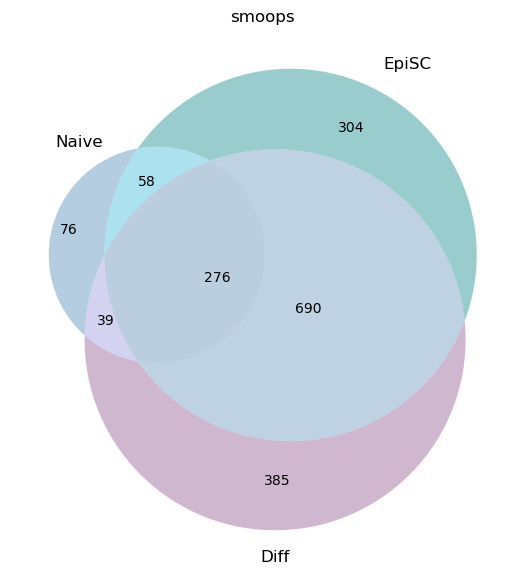

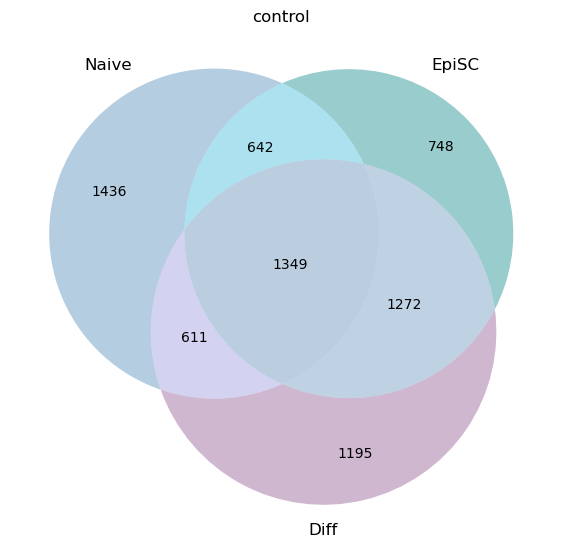

smOOPS genes in each state and overlap:
	N. of smoops_naive:	 449
	N. of smoops_epi:	 1328
	N. of smoops_diff:	 1390
	N. of smoops_common:	 1828

Control genes in each state and overlap:
	N. of control_naive:	 4038
	N. of control_epi:	 4011
	N. of control_diff:	 4427
	N. of control_common:	 1349

All control and smOOPs genes:
	N. of all_common:	 3177


In [99]:
def subset_genes(semi, oops, type):    
    if type == "smoops":
        change_smoops = 2
        padj_smoops = 0.01
        semi_subset = semi[(semi['padj'] < padj_smoops) & (semi['log2FoldChange'] > math.log2(change_smoops))]
        oops_subset = oops[(oops['padj'] < padj_smoops) & (oops['log2FoldChange'] > math.log2(change_smoops))]
    else:
        change_control = 1.4
        padj_control = 0.01
        semi_subset = semi[(semi['padj'] > padj_control) & ((semi['log2FoldChange'] > -math.log2(change_control)) & (semi['log2FoldChange'] < math.log2(change_control)))]
        oops_subset = oops[(oops['padj'] > padj_control) & ((oops['log2FoldChange'] > -math.log2(change_control)) & (oops['log2FoldChange'] < math.log2(change_control)))]
        
    semi_genes_subset = set(semi_subset['gene_id'])
    oops_genes_subset = set(oops_subset['gene_id'])
    
    subset_genes = semi_genes_subset.intersection(oops_genes_subset)
    
    return subset_genes

def plot_venn_for_all_states(naive, epi, diff, title):
    plt.figure(figsize=(7,7))
    venn3([naive, epi, diff], ('Naive', 'EpiSC', 'Diff'), set_colors=("#4682B4", "#008080", "#894c89"))
    plt.title(title)
    plt.show()
    
# SMOOPS
smoops_naive = subset_genes(semi_naive_deseq, oops_naive_deseq, "smoops")
smoops_epi = subset_genes(semi_epi_deseq, oops_epi_deseq, "smoops")
smoops_diff = subset_genes(semi_diff_deseq, oops_diff_deseq, "smoops")

plot_venn_for_all_states(smoops_naive, smoops_epi, smoops_diff, "smoops")

smoops_common = smoops_naive.union(smoops_epi).union(smoops_diff)

# CONTROL
control_naive = subset_genes(semi_naive_deseq, oops_naive_deseq, "control")
control_epi = subset_genes(semi_epi_deseq, oops_epi_deseq, "control")
control_diff = subset_genes(semi_diff_deseq, oops_diff_deseq, "control")

plot_venn_for_all_states(control_naive, control_epi, control_diff, "control")

control_common = control_naive.intersection(control_epi).intersection(control_diff)

#ALL
all_common = smoops_common.union(control_common)

# Print summaray of lengths of all sets
print("smOOPS genes in each state and overlap:")
print("\tN. of smoops_naive:\t", len(smoops_naive))
print("\tN. of smoops_epi:\t", len(smoops_epi))
print("\tN. of smoops_diff:\t", len(smoops_diff))
print("\tN. of smoops_common:\t", len(smoops_common))
print("\nControl genes in each state and overlap:")
print("\tN. of control_naive:\t", len(control_naive))
print("\tN. of control_epi:\t", len(control_epi))
print("\tN. of control_diff:\t", len(control_diff))
print("\tN. of control_common:\t", len(control_common))
print("\nAll control and smOOPs genes:")
print("\tN. of all_common:\t", len(all_common))

In [19]:
semi_common_subset = semi_naive_deseq[semi_naive_deseq['gene_id'].isin(all_common)]
oops_common_subset = oops_naive_deseq[oops_naive_deseq['gene_id'].isin(all_common)]

smoops_common_subset = pd.merge(semi_common_subset, oops_common_subset, on='gene_id', suffixes=('_semi', '_oops'))
smoops_common_subset.drop(columns=['baseMean_semi', 'pvalue_semi', 'baseMean_oops', 'pvalue_oops'], inplace=True)
smoops_common_subset

,gene_id,log2FoldChange_semi,lfcSE_semi,padj_semi,log2FoldChange_oops,lfcSE_oops,padj_oops
0,ENSMUSG00000000037.18,-0.459583,0.369711,0.244046,-0.014219,0.366529,9.758487e-01
1,ENSMUSG00000000078.8,-0.009421,0.131383,0.963778,0.149995,0.130646,3.359834e-01
2,ENSMUSG00000000085.17,0.650284,0.253508,0.017009,1.877842,0.252871,5.348241e-14
3,ENSMUSG00000000142.16,0.346619,0.310288,0.331335,0.362254,0.321637,3.147877e-01
4,ENSMUSG00000000154.17,0.155056,0.379469,0.737078,-0.216759,0.409144,6.441223e-01
...,...,...,...,...,...,...,...
3172,ENSMUSG00000118837.1,-0.167267,0.663235,0.637967,-0.174103,0.885941,7.739888e-01
3173,ENSMUSG00000119206.1,-0.038833,0.689501,0.896634,-0.278619,0.986183,5.781040e-01
3174,ENSMUSG00000119774.1,-0.061162,0.700187,0.802023,-0.154623,1.017703,7.325572e-01
3175,ENSMUSG00002075524.1,-0.068491,0.690413,0.814815,0.131324,0.976290,8.019153e-01


In [21]:
def parse_annotation_to_bed(path):
    # Initialize an empty list to store the transcript information
    annotation_bed = []

    with open(path, 'r') as gtf_file:
        for line in gtf_file:
            if line.startswith('#'):
                continue

            columns = line.strip().split('\t')
            attributes = columns[8]
            
            # Check if 'transcript_id' is in the attributes column
            if 'transcript_id' in attributes:
                # Extract the transcript_id
                gene_name = [field for field in attributes.split(';') if 'gene_name' in field][0]
                gene_name = gene_name.split('"')[1]
                gene_id = [field for field in attributes.split(';') if 'gene_id' in field][0]
                gene_id = gene_id.split('"')[1]
                transcript_id = [field for field in attributes.split(';') if 'transcript_id' in field][0]
                transcript_id = transcript_id.split('"')[1]
                
                # Append the transcript_id to the list
                annotation_bed.append(columns[:7] + [gene_name] + [gene_id] + [transcript_id])

    # Define the column names
    column_names = ['chr', 'source', 'feature', 'start', 'end', 'score', "strand", 'gene_name', 'gene_id', 'transcript_id']

    # Convert the list to a DataFrame
    annotation_bed = pd.DataFrame(annotation_bed, columns=column_names)
    annotation_bed['start'] = annotation_bed['start'].astype(int) - 1
    annotation_bed['end'] = annotation_bed['end'].astype(int)
    
    annotation_bed["feature_length"] = annotation_bed["end"] - annotation_bed["start"]
    
    return annotation_bed

annotation_gtf_path = '/ceph/hpc/home/novljanj/data_storage/genomes/genome_m39/gencode.vM27.chr_patch_hapl_scaff.annotation.gtf'
annotation_bed = parse_annotation_to_bed(annotation_gtf_path)
annotation_bed

,chr,source,feature,start,end,score,strand,gene_name,gene_id,transcript_id,feature_length
0,chr1,HAVANA,transcript,3143475,3144545,.,+,4933401J01Rik,ENSMUSG00000102693.2,ENSMUST00000193812.2,1070
1,chr1,HAVANA,exon,3143475,3144545,.,+,4933401J01Rik,ENSMUSG00000102693.2,ENSMUST00000193812.2,1070
2,chr1,ENSEMBL,transcript,3172238,3172348,.,+,Gm26206,ENSMUSG00000064842.3,ENSMUST00000082908.3,110
3,chr1,ENSEMBL,exon,3172238,3172348,.,+,Gm26206,ENSMUSG00000064842.3,ENSMUST00000082908.3,110
4,chr1,HAVANA,transcript,3276123,3286567,.,-,Xkr4,ENSMUSG00000051951.6,ENSMUST00000162897.2,10444
...,...,...,...,...,...,...,...,...,...,...,...
1814260,JH584304.1,ENSEMBL,stop_codon,55479,55482,.,-,ENSMUSG00000095041,ENSMUSG00000095041.8,ENSMUST00000178343.2,3
1814261,JH584304.1,ENSEMBL,exon,52690,54867,.,-,ENSMUSG00000095041,ENSMUSG00000095041.8,ENSMUST00000178343.2,2177
1814262,JH584304.1,ENSEMBL,UTR,58616,59690,.,-,ENSMUSG00000095041,ENSMUSG00000095041.8,ENSMUST00000178343.2,1074
1814263,JH584304.1,ENSEMBL,UTR,55111,55482,.,-,ENSMUSG00000095041,ENSMUSG00000095041.8,ENSMUST00000178343.2,371


In [38]:
def parse_expression_data_tx(path):
    expression_data_tx = pd.read_csv(path, sep="\t").reset_index(drop=True)

    # Define the sets of triplets
    triplets = [
        ('control_diff', 'control_diff_1', 'control_diff_2', 'control_diff_3'),
        ('control_epiSC', 'control_epiSC_1', 'control_epiSC_2', 'control_epiSC_3'),
        ('control_naive', 'control_naive_1', 'control_naive_2', 'control_naive_3'),
        ('oops_diff', 'oops_diff_1', 'oops_diff_2', 'placeholder'),
        ('oops_epiSC', 'oops_epiSC_1', 'oops_epiSC_2', 'oops_epiSC_3'),
        ('oops_naive', 'oops_naive_1', 'oops_naive_2', 'oops_naive_3'),
        ('semi_diff', 'semi_diff_1', 'semi_diff_2', 'semi_diff_3'),
        ('semi_epiSC', 'semi_epiSC_1', 'semi_epiSC_2', 'semi_epiSC_3'),
        ('semi_naive', 'semi_naive_1', 'semi_naive_2', 'semi_naive_3'),
    ]

    expression_data_tx_mean = expression_data_tx[['tx',	'gene_id']].copy()

    # Calculate the mean for each triplet
    for triplet in triplets:
        name, col1, col2, col3 = triplet
        if col3 == 'placeholder':
            expression_data_tx_mean[f'{name}_mean'] = expression_data_tx[[col1, col2]].mean(axis=1)
        else:
            expression_data_tx_mean[f'{name}_mean'] = expression_data_tx[[col1, col2, col3]].mean(axis=1)
            
    return expression_data_tx_mean

expression_data_tx_path = '/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/salmon_count_tables/salmon.merged.transcript_tpm.tsv'
expression_data_tx = parse_expression_data_tx(expression_data_tx_path)
expression_data_tx

,tx,gene_id,control_diff_mean,control_epiSC_mean,control_naive_mean,oops_diff_mean,oops_epiSC_mean,oops_naive_mean,semi_diff_mean,semi_epiSC_mean,semi_naive_mean
0,ENSMUST00000193812.2,ENSMUSG00000102693.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSMUST00000082908.3,ENSMUSG00000064842.3,0.000000,0.000000,0.000000,0.000000,14.510217,0.000000,0.000000,0.000000,0.000000
2,ENSMUST00000162897.2,ENSMUSG00000051951.6,0.121971,0.076094,0.000000,3.146794,2.262811,0.000000,1.022712,0.579078,0.000000
3,ENSMUST00000159265.2,ENSMUSG00000051951.6,0.110483,0.051590,0.003936,2.581526,2.391671,0.012318,1.271065,0.722496,0.000000
4,ENSMUST00000070533.5,ENSMUSG00000051951.6,0.457582,0.263619,0.003004,2.841368,2.281105,0.028763,1.579194,1.023398,0.014051
...,...,...,...,...,...,...,...,...,...,...,...
142370,ENSMUST00000082419.1,ENSMUSG00000064368.1,621.270642,504.666223,415.347154,206.637210,182.762892,354.407695,349.510789,283.050650,300.076839
142371,ENSMUST00000082420.1,ENSMUSG00000064369.1,4.197865,15.570545,10.830482,29.172719,14.247305,74.088513,0.000000,11.419818,30.568919
142372,ENSMUST00000082421.1,ENSMUSG00000064370.1,625.218187,569.399975,519.134797,1993.341228,2004.590570,2528.055690,859.124280,855.854765,659.365598
142373,ENSMUST00000082422.1,ENSMUSG00000064371.1,0.000000,3.399568,16.345621,48.046157,6.887269,42.443969,18.541927,0.000000,11.323629


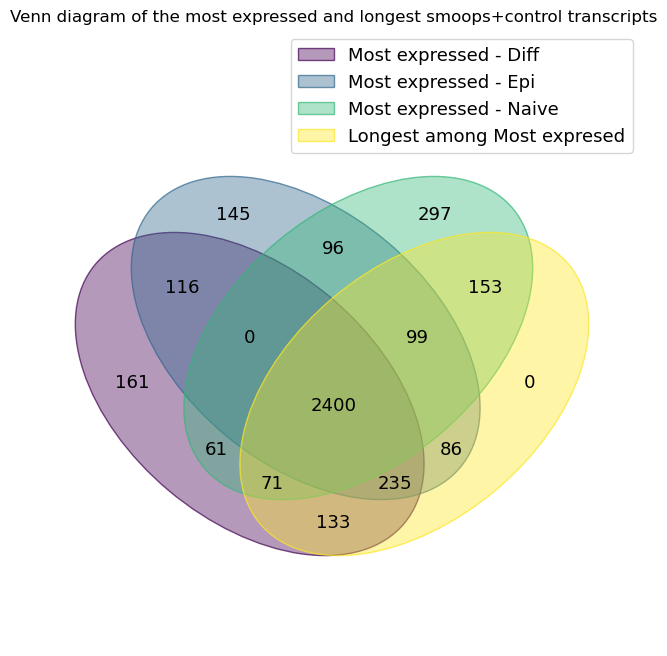

In [72]:
def get_most_expressed_transcripts(df, column, all_common):
       
    # Find the longest transcript for each gene
    longest_transcripts = df.sort_values(by=['gene_id', column], ascending=[True, False]).drop_duplicates(subset=['gene_id'])  
    
    # Subset the original dataframe to include only the longest transcripts
    subset_df = df[df['tx'].isin(longest_transcripts['tx'])]
    
    subset_df = subset_df[subset_df['gene_id'].isin(all_common)]
    
    return set(subset_df["tx"])

def get_longest_transcripts_among_most_expressed(annotation_bed, all_most_expressed):
    
    # Subset the dataframe to include only the transcripts
    annotation_bed_transcripts = annotation_bed[annotation_bed['feature'] == 'transcript']
    
    # Subset the annotation bed to include only the most expressed transcripts
    annotation_bed_most_expressed = annotation_bed_transcripts[annotation_bed_transcripts['transcript_id'].isin(all_most_expressed)]

    # Find the longest transcript for each gene
    longest_transcripts = annotation_bed_most_expressed[annotation_bed_most_expressed['feature'] == 'transcript'].sort_values(by=['gene_id', 'feature_length'], ascending=[True, False]).drop_duplicates(subset=['gene_id'])  
    
    # Subset the original dataframe to include only the longest transcripts
    subset_df = annotation_bed_most_expressed[annotation_bed_most_expressed['transcript_id'].isin(longest_transcripts['transcript_id'])]
    
    return set(subset_df["transcript_id"])

def plot_4way_venn_diagram(dict):
    
    # Plot the Venn diagram
    venn(dict)
    plt.title('Venn diagram of the most expressed and longest smoops+control transcripts')
    plt.show()
    
# Get the most expressed transcripts
diff_most_expressed = get_most_expressed_transcripts(expression_data_tx, 'semi_diff_mean', all_common)
epi_most_expressed = get_most_expressed_transcripts(expression_data_tx, 'semi_epiSC_mean', all_common)
naive_most_expressed = get_most_expressed_transcripts(expression_data_tx, 'semi_naive_mean', all_common)

# Get the longest transcripts among the most expressed
all_most_expressed = diff_most_expressed.union(epi_most_expressed).union(naive_most_expressed)
longest_among_most_expressed = get_longest_transcripts_among_most_expressed(annotation_bed, all_most_expressed)

# Prepare the dictionary for the Venn diagram
selected_transcripts = {
    'Most expressed - Diff': diff_most_expressed,
    'Most expressed - Epi': epi_most_expressed,
    'Most expressed - Naive': naive_most_expressed,
    'Longest among Most expresed': longest_among_most_expressed
}
# Plot the Venn diagram
plot_4way_venn_diagram(selected_transcripts)

In [108]:
def get_final_trasncripts_from_annotation(annotation_bed, transcripts, feature):
      
    annotation_bed_transcripts = annotation_bed[annotation_bed['feature'] == feature]

    final_transcripts  = annotation_bed_transcripts[annotation_bed_transcripts['transcript_id'].isin(transcripts)]
    final_transcripts = final_transcripts[['chr','start','end','gene_id', 'feature','strand','gene_name','transcript_id','feature_length']]
    
    return final_transcripts

def add_gene_set_label(df, sets, names_of_sets):
    for set, name_of_set in zip(sets, names_of_sets):
        df[name_of_set] = df['gene_id'].isin(set)
    return df

# Get the final transcripts from the annotation bed
final_transcripts = get_final_trasncripts_from_annotation(annotation_bed, longest_among_most_expressed, 'transcript')

# Add gene set labels to the final transcripts
sets = [smoops_naive, smoops_epi, smoops_diff, control_common]
names_of_sets = ['smoops_naive', 'smoops_epi', 'smoops_diff', 'control_common']

# Add gene set labels to the final transcripts
final_transcripts_with_labels = add_gene_set_label(final_transcripts.copy(), sets, names_of_sets)

In [109]:
def parse_expression_data_gene(path):
    
    expression_data_gene= pd.read_csv(path, sep="\t").reset_index(drop=True)

    # Define the sets of triplets
    triplets = [
        ('control_diff', 'control_diff_1', 'control_diff_2', 'control_diff_3'),
        ('control_epiSC', 'control_epiSC_1', 'control_epiSC_2', 'control_epiSC_3'),
        ('control_naive', 'control_naive_1', 'control_naive_2', 'control_naive_3'),
        ('oops_diff', 'oops_diff_1', 'oops_diff_2', 'placeholder'),
        ('oops_epiSC', 'oops_epiSC_1', 'oops_epiSC_2', 'oops_epiSC_3'),
        ('oops_naive', 'oops_naive_1', 'oops_naive_2', 'oops_naive_3'),
        ('semi_diff', 'semi_diff_1', 'semi_diff_2', 'semi_diff_3'),
        ('semi_epiSC', 'semi_epiSC_1', 'semi_epiSC_2', 'semi_epiSC_3'),
        ('semi_naive', 'semi_naive_1', 'semi_naive_2', 'semi_naive_3'),
    ]

    expression_data_gene_mean = expression_data_gene[['gene_name',	'gene_id']].copy()

    # Calculate the mean for each triplet
    for triplet in triplets:
        name, col1, col2, col3 = triplet
        if col3 == 'placeholder':
            expression_data_gene_mean[f'{name}_mean_tpm'] = expression_data_gene[[col1, col2]].mean(axis=1)
        else:
            expression_data_gene_mean[f'{name}_mean_tpm'] = expression_data_gene[[col1, col2, col3]].mean(axis=1)
            
    return expression_data_gene_mean

def add_expression_to_final_data(df, expression_data_gene):
    
    expression_data_gene_subset = expression_data_gene[['gene_id',	'semi_diff_mean_tpm',	'semi_epiSC_mean_tpm',	'semi_naive_mean_tpm']]
    df = pd.merge(df, expression_data_gene_subset, on='gene_id')
    
    return df

expression_data_gene_path = '/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/salmon_count_tables/salmon.merged.gene_tpm.tsv'
expression_data_gene = parse_expression_data_gene(expression_data_gene_path)

final_transcripts_with_labels_and_expression = add_expression_to_final_data(final_transcripts_with_labels, expression_data_gene)

final_transcripts_with_labels_and_expression

,chr,start,end,gene_id,feature,strand,gene_name,transcript_id,feature_length,smoops_naive,smoops_epi,smoops_diff,control_common,semi_diff_mean_tpm,semi_epiSC_mean_tpm,semi_naive_mean_tpm
0,chr1,3284704,3741721,ENSMUSG00000051951.6,transcript,-,Xkr4,ENSMUST00000070533.5,457017,False,True,True,False,3.872970,2.324972,0.014051
1,chr1,3435953,3438772,ENSMUSG00000103377.2,transcript,-,Gm37180,ENSMUST00000195335.2,2819,False,True,True,False,0.521827,0.301747,0.012481
2,chr1,3445778,3448011,ENSMUSG00000104017.2,transcript,-,Gm37363,ENSMUST00000192336.2,2233,False,False,True,False,0.485116,0.206451,0.000000
3,chr1,3535199,3537508,ENSMUSG00000103025.2,transcript,-,Gm37686,ENSMUST00000194099.2,2309,False,False,True,False,0.627143,0.321620,0.000000
4,chr1,3582673,3584730,ENSMUSG00000103201.2,transcript,-,Gm37329,ENSMUST00000192973.2,2057,False,False,True,False,1.040409,0.393665,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3172,chrX,165173028,165223700,ENSMUSG00000040586.9,transcript,-,Ofd1,ENSMUST00000049501.9,50672,False,True,True,False,2.596442,2.308879,1.399653
3173,chrX,168094525,168103276,ENSMUSG00000031352.11,transcript,-,Hccs,ENSMUST00000033717.9,8751,False,False,False,True,8.779636,9.323919,9.318443
3174,chrY,898031,921980,ENSMUSG00000056673.15,transcript,+,Kdm5d,ENSMUST00000189626.7,23949,False,False,False,True,0.046338,0.023724,0.321383
3175,chrY,1260770,1286629,ENSMUSG00000069045.12,transcript,-,Ddx3y,ENSMUST00000091190.12,25859,False,True,True,False,12.061610,9.830595,1.813766


In [110]:
final_transcripts_with_labels_and_expression.to_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Results/Master_Dataset/all_smOOPS_and_controls.tsv', sep="\t", index=False)

In [114]:
# Get the final all exons features from the annotation bed
final_all_exons = get_final_trasncripts_from_annotation(annotation_bed, longest_among_most_expressed, 'exon')
final_all_exons_with_labels = add_gene_set_label(final_all_exons.copy(), sets, names_of_sets)
final_all_exons_with_labels_and_expression = add_expression_to_final_data(final_all_exons_with_labels, expression_data_gene)
final_all_exons_with_labels_and_expression.to_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Results/Master_Dataset/all_smOOPS_and_controls_features.tsv', sep="\t", index=False)